# Data Visualization of Car Parking 

In [5]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os

## Reading Data from .csv file
* We will be using the parking data for the period of 1 year starting from 2020/01/01 to 2020/12/31 
* However, it is impossible for us to collect parking data for the whole year. 
* Therefore, the data will be generated from our generator and that will be used to visualize. 
* There will be 3 columns such as Floor_slot which is the parking location, Availability which is the indication of whether or not the parking slot is occupied and last but not least, Timestamp. 
* There will be over 21 million data of the parking status in this .csv file as per below.

In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv ('C:/Users/LinH/Downloads/carpar_analysis/data.csv')
df.columns = ['Floor_slot','Availability','Timestamp']
print(df)

         Floor_slot Availability            Timestamp
0              F1_1    available  2020-01-01 09:00:00
1              F1_2    available  2020-01-01 09:00:00
2              F1_3    available  2020-01-01 09:00:00
3              F1_4    available  2020-01-01 09:00:00
4              F1_5    available  2020-01-01 09:00:00
...             ...          ...                  ...
21410995      F3_21    available  2020-12-31 21:59:00
21410996      F3_22    available  2020-12-31 21:59:00
21410997      F3_23    available  2020-12-31 21:59:00
21410998      F3_24    available  2020-12-31 21:59:00
21410999      F3_25    available  2020-12-31 21:59:00

[21411000 rows x 3 columns]


## Comparison of Parking slots availability for the whole year
* We distinguished the numbers of available and occupied parking slots over the year from 21 million data.
* Why? Because we can know that how many parking slots would be occupied, and can even be used that data in case we want to know how much money might be generated from parkings such as Shopping Malls.
* We plotted the overall available and occupied parking slots in bar graph (numbers of slots) and pie chart (percentage of slots).

21411000
21411000
the total number of Available Parking is 8050613
the total number of Unavailable Parking is 13360387


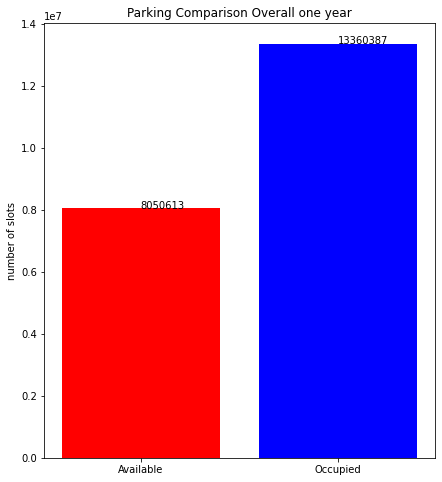

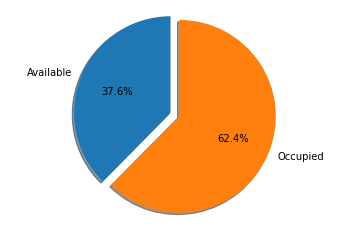

In [3]:
data_floor = df.Floor_slot
data_available = df.Availability
data_floor_list= list( data_floor.dropna()) 
data_available_list = list(data_available.dropna())
total_floor = 0
total_available = 0
total_unavailable = 0
print(len(data_floor_list))
print(len(data_available_list))
for slots in  data_available_list:
  if slots == 'available':
    total_available = total_available + 1
  elif slots == 'occupied':
    total_unavailable = total_unavailable +1 
print(f"the total number of Available Parking is {total_available}")
print(f"the total number of Unavailable Parking is {total_unavailable}")

n_available = total_available
n_occupied = total_unavailable
total_parkings = [n_available, n_occupied]

slots = ("Available", "Occupied")
y_pos = np.arange(len(total_parkings))
colors = ['r', 'b']
plt.figure(figsize=(7, 8))
plt.bar(y_pos, total_parkings, align='center', color=colors)
plt.xticks(y_pos, slots)

plt.ylabel("number of slots")
plt.title("Parking Comparison Overall one year")
for i in range(len(total_parkings)):
    plt.text(i, total_parkings[i]+10, str(total_parkings[i]))
plt.show()
labels = 'Available', 'Occupied'
sizes = [n_available,n_occupied]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [4]:
df.count()

Floor_slot      21411000
Availability    21411000
Timestamp       21411000
dtype: int64

In [5]:
display(df.describe())

,Floor_slot,Availability,Timestamp
count,21411000,21411000,21411000
unique,75,2,285480
top,F2_3,occupied,2020-06-12 09:33:00
freq,285480,13360387,75


## Visualization of the Average Occupied Parking Slot for A Day
* We plotted the average percentage of occupied slot for a day.
* We observed the data between morning 9:00am to night 21:00pm.
* We can observe that the peak hours of parking slots is between 16:00 pm and 19:00 pm as per following graph.

In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.index = df['Timestamp']

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


Text(0.5, 0, 'Time: From morning to night')

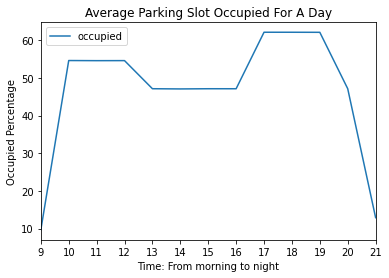

In [8]:
tdf = df.groupby(df.index)['Availability'].apply(lambda x: (x == 'occupied').sum()).reset_index(name="occupied")
tdf.index = tdf['Timestamp']
occupied_percent = tdf.groupby(tdf.index)['occupied'].apply(lambda x: (x/75)*100).reset_index(name="percent_occupied")
occupied_percent.index = occupied_percent['Timestamp']
print(type(tdf), type(occupied_percent))
tdf.groupby(tdf.index.hour).mean().plot(xticks=tdf.index.hour.unique())
plt.title("Average Parking Slot Occupied For A Day")
plt.ylabel("Occupied Percentage")
plt.xlabel("Time: From morning to night")

## Visualization of the Average Free Parking Slot for A Day
* We plotted the average percentage of free parking slot for a day.
* We observed the data between morning 9:00am to night 21:00pm.
* We can observe that normally, most of our parking slots are occupied except the early morning around 9am and the night around 21:00 pm.
* So, we can conclude that our parking slots are quite useful for the cars around there and might generate decent amount of money since many of the slots are busy.

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


Text(0.5, 0, 'Time: From morning to night')

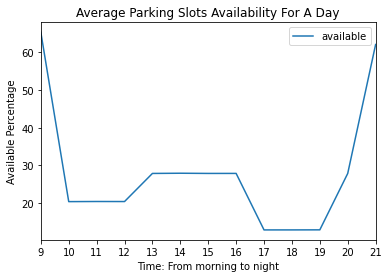

In [15]:
tdf = df.groupby(df.index)['Availability'].apply(lambda x: (x == 'available').sum()).reset_index(name="available")
tdf.index = tdf['Timestamp']
occupied_percent = tdf.groupby(tdf.index)['available'].apply(lambda x: (x/75)*100).reset_index(name="percent_available")
occupied_percent.index = occupied_percent['Timestamp']
print(type(tdf), type(occupied_percent))
tdf.groupby(tdf.index.hour).mean().plot(xticks=tdf.index.hour.unique())
plt.title("Average Parking Slots Availability For A Day")
plt.ylabel("Available Percentage")
plt.xlabel("Time: From morning to night")

## Visualization Time Series Data

* Initially, we modified the Query Data Result from the data analytics part according to our need for visualization and decomposing time series. Original data source in our github: [here](https://github.com/iotelligence/Data-analytic/blob/master/CartotalSummary/Queryresult.csv)
* We then plotted the detailed information for total number of cars which parked on January by date as **the graph below**.

In [2]:
def show_plot(
    total_car,
    figsize=(13, 8),
    color= "b",
    linestyle='-.',
    xlabel="Date",
    ylabel="No. of cars",
    label=None,
):
    plt.figure(figsize=figsize)
    plt.plot(total_car.index, total_car, color=color, label=label, linestyle=linestyle)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("Total number of cars by date",fontsize=14)
    plt.legend(loc=2)

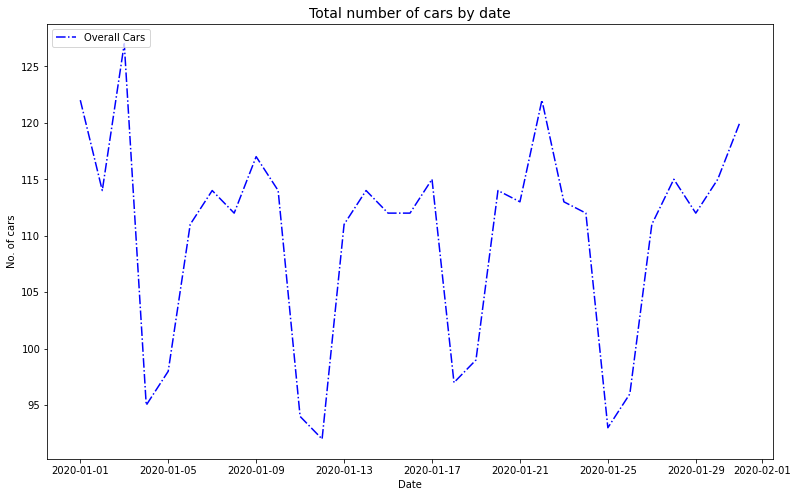

In [3]:
show_plot(total_car,label = 'Overall Cars')

## Time Series Decomposition Analysis 

#### Why decomposing time series? 
#### Beacuase it provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting. [source](https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/)
It is a mathematical procedure which transforms a time series into multiple different time series. As the original time series is often split into 3 component series, we also decomposed the same such as:
* **Trend**: The underlying trend of our data and the trend exists when there is a long-term increase or decrease in the data, *for example*, as you can see in **our graph**, the total number of cars decrease steadily until 13th of January and then rise up again slowly.
* **Seasonality**: The pattern happens when there is a seasonal factor such as the day of the week which affects the time series, *for example*, in **our graph**, the significance decline pattern occurs on Weekends when fewer cars park comparing to Weekdays.
* **Residuals**: Ideally, trend and seasonality should capture most of the patterns in the time series. Hence, the residuals represent what’s left from the time series, after trend and seasonal have been removed from the original signal.<br>
Last but not least,
* **Original**: To see the differences between each patterns clearly

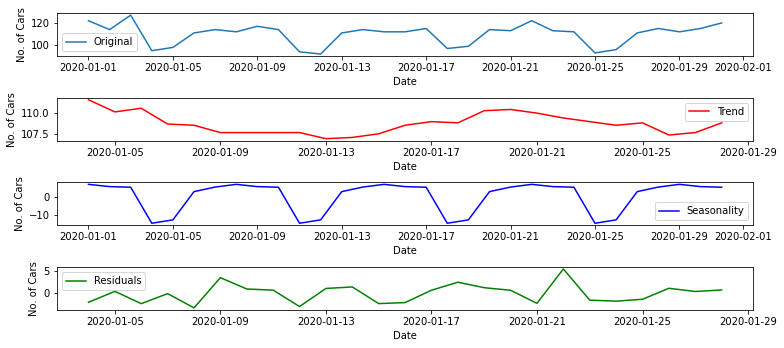

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

total_car = pd.read_csv ('C:/Users/LinH/Downloads/carpar_analysis/Queryresult.csv',
                         parse_dates = ['Date'], index_col = ['Date'])

decomp = seasonal_decompose(total_car)
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.figure(figsize=(11,4.85))
plt.subplot(411)
plt.plot(total_car, label='Original')
plt.ylabel("No. of Cars")
plt.xlabel("Date")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend',color='r')
plt.ylabel("No. of Cars")
plt.xlabel("Date")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality',color='b')
plt.ylabel("No. of Cars")
plt.xlabel("Date")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals',color='g')
plt.ylabel("No. of Cars")
plt.xlabel("Date")
plt.legend(loc='best')
plt.tight_layout()
